In [1]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [2]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [4]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
               SELECT 
    CASE 
        WHEN ca.career IN ('경력무관', '초대졸이상') THEN '경력무관'
        WHEN ca.career = '신입' THEN '신입'
        WHEN ca.career IN ('경력1년이상', '경력2년이상', '경력3년이상') THEN '1-3년'
        WHEN ca.career IN ('경력4년이상', '경력5년이상', '경력6년이상') THEN '4-6년'
    END AS 경력,
    co.avg_salary AS 평균연봉
FROM 
    recruit_info re
JOIN 
    company_info co ON re.comp_name_id = co.comp_id
JOIN 
    career_info ca ON re.career_id = ca.career_id
WHERE 
    ca.career IS NOT NULL
    AND co.avg_salary IS NOT NULL
    AND co.avg_salary > 0
    AND ca.career NOT IN ('경력7년이상', '경력10년이상', '경력8년이상', '경력16년이상')           
ORDER BY 
    평균연봉 DESC;

""")
result = cursor.fetchall()

df = pd.DataFrame(result)

df.columns = ["경력", "평균연봉(만)"]

df

,경력,평균연봉(만)
0,경력무관,9175
1,경력무관,8579
2,1-3년,8285
3,4-6년,8060
4,4-6년,8060
...,...,...
56,신입,3864
57,신입,3811
58,1-3년,3811
59,4-6년,3464


In [8]:
# 기업규모 정렬 순서 설정
order = ["경력무관", "신입", "1-3년", "4-6년"]
df["경력"] = pd.Categorical(df["경력"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["경력"]).reset_index(drop=True)

# 결과 출력
df


,경력,평균연봉(만)
0,경력무관,9175
1,경력무관,7613
2,경력무관,8579
3,경력무관,6924
4,경력무관,6869
...,...,...
56,4-6년,6492
57,4-6년,6550
58,4-6년,8060
59,4-6년,6197


/tmp/ipykernel_22494/3350819564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="경력", y="평균연봉(만)", palette=colors)


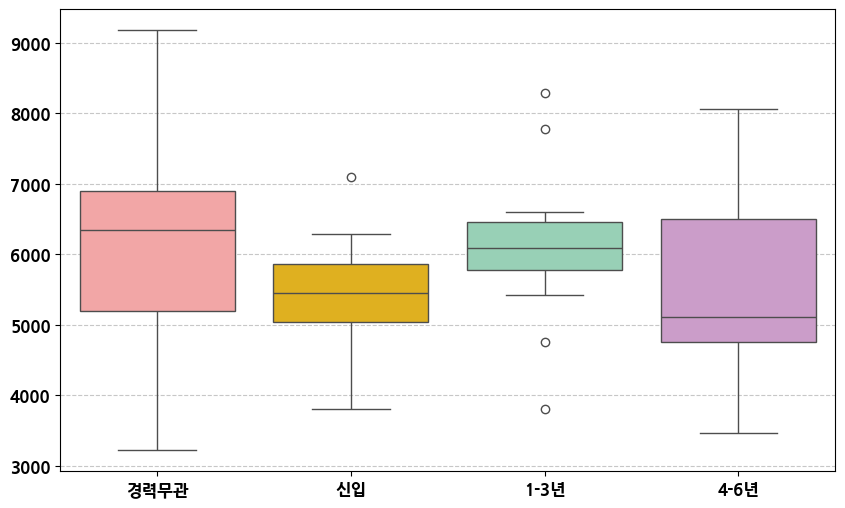

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 생성
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="경력", y="평균연봉(만)", palette=colors)

# y축 라벨 90도 회전 및 폰트 크기와 굵기 설정
plt.ylabel("")
# plt.ylabel("(만)", rotation=90, fontsize=14, fontweight="bold")
plt.xlabel("", fontsize=14, fontweight="bold")

# 제목 추가
# plt.title("기업규모별 평균 연봉 분포", fontsize=16, fontweight="bold")

# 눈금 폰트 크기와 굵기 설정|
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# 격자선 설정
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
